<a href="https://colab.research.google.com/github/x18134301/x18134301_TusharDalvi/blob/master/Useing_Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import cv2
import numpy as np
import random
#!pip install Image
#import Image
from PIL import Image
from PIL import ImageOps
from google.colab import drive

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\
import os
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
#Trying new layers for pneumonia 
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
np.random.seed(1000)
#new layers end here
print(os.listdir("/content/gdrive/My Drive/chest_xray"))

['val', 'test', 'train', '.DS_Store']


Using TensorFlow backend.


In [0]:
# Load and augment training data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255, 
    rotation_range=20, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/My Drive/chest_xray/train',
    batch_size=16,
    target_size=(224, 224),
    shuffle=True,
    class_mode='categorical'
)

Found 5216 images belonging to 2 classes.


In [0]:
# Load validation and test data
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
val_generator = val_datagen.flow_from_directory(
    '/content/gdrive/My Drive/chest_xray/val',
    batch_size=16,
    target_size=(224, 224),
    class_mode='categorical'
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(
    '/content/gdrive/My Drive/chest_xray/test',
    batch_size=16,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [0]:
model = Sequential()

In [0]:
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam',\
 metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)        

In [0]:

Log = model.fit_generator(
    train_generator,
    epochs=20,
    verbose=1,
    validation_data=val_generator,
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
326/326 [==============================] - 2197s 7s/step - loss: 0.5904 - acc: 0.7138 - val_loss: 1.7542 - val_acc: 0.5000
Epoch 2/20
326/326 [==============================] - 934s 3s/step - loss: 0.4286 - acc: 0.8018 - val_loss: 1.0037 - val_acc: 0.5000
Epoch 3/20
326/326 [==============================] - 946s 3s/step - loss: 0.3692 - acc: 0.8413 - val_loss: 1.3903 - val_acc: 0.5000
Epoch 4/20
326/326 [==============================] - 942s 3s/step - loss: 0.3253 - acc: 0.8677 - val_loss: 4.3417 - val_acc: 0.5000
Epoch 5/20
326/326 [==============================] - 950s 3s/step - loss: 0.3065 - acc: 0.8691 - val_loss: 3.5164 - val_acc: 0.5000
Epoch 6/20
326/326 [==============================] - 942s 3s/step - loss: 0.2893 - acc: 0.8788 - val_loss: 4.0167 - val_acc: 0.5000
Epoch 7/20
326/326 [==============================] - 935s 3s/step - loss: 0.2708 - acc: 0.8946 - val_los

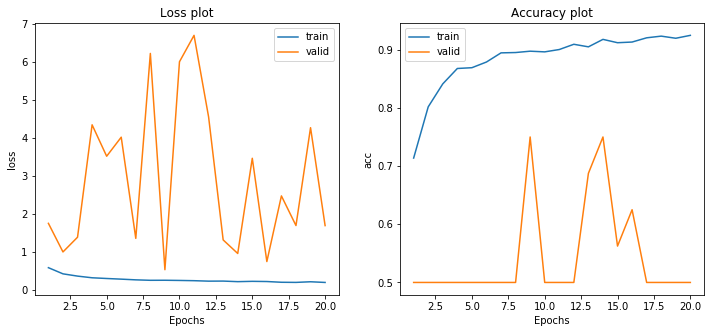

In [0]:
# plot the model loss and accuracy
train_loss = Log.history['loss']
train_acc = Log.history['acc']

valid_loss = Log.history['val_loss']
valid_acc = Log.history['val_acc']

x = [(i+1) for i in range(len(train_loss))]

f,ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(x, train_loss)
ax[0].plot(x, valid_loss)
ax[0].set_title("Loss plot")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("loss")
ax[0].legend(['train', 'valid'])


ax[1].plot(x, train_acc)
ax[1].plot(x, valid_acc)
ax[1].set_title("Accuracy plot")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("acc")
ax[1].legend(['train', 'valid'])

plt.show()

In [0]:
loss, test_acc = model.evaluate_generator(
    test_generator,
    steps=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=True,
    verbose=1
)

print(test_acc)

39/39 [==============================] - 226s 6s/step
0.6362179487179487


In [0]:
model.save('model.h5')

In [0]:
# Load model for testing
model = tf.keras.models.load_model('model.h5')

test_dir = Path('/content/gdrive/My Drive/chest_xray/test')

normal_cases_dir = test_dir / 'NORMAL'
pneumonia_cases_dir = test_dir / 'PNEUMONIA'

normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

test_data = []
test_labels = []

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224, 224))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tf.keras.utils.to_categorical(0, num_classes=2)
    test_data.append(img)
    test_labels.append(label)

for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224, 224))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tf.keras.utils.to_categorical(1, num_classes=2)
    test_data.append(img)
    test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (624, 224, 224, 3)
Total number of labels: (624, 2)


<Figure size 432x288 with 0 Axes>

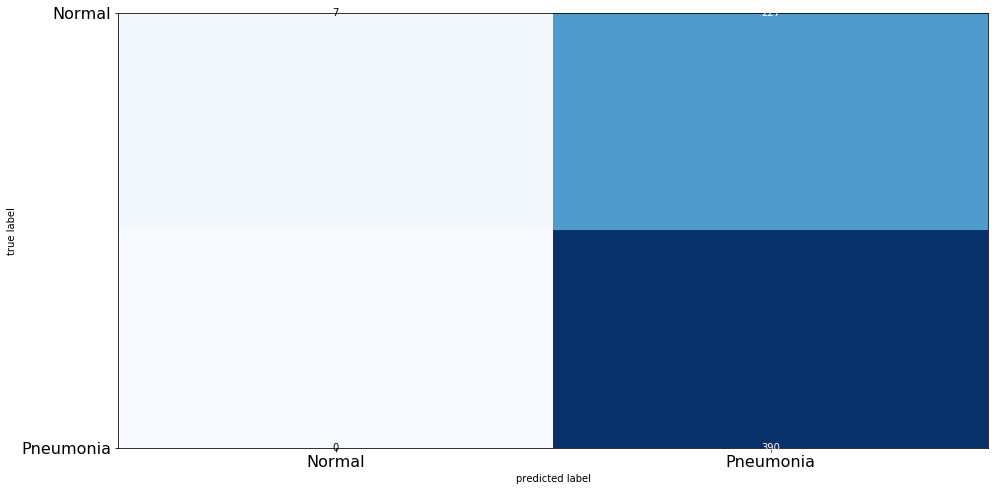

Recall of the model is 1.00
Precision of the model is 0.63


In [0]:
# Get predictions
preds = model.predict(test_data, batch_size=16)#<-
preds = np.argmax(preds, axis=-1)

# Original labels
orig_test_labels = np.argmax(test_labels, axis=-1)

cm = confusion_matrix(orig_test_labels, preds)
plt.figure()
plot_confusion_matrix(cm, figsize=(40, 8), hide_ticks=True,
                      cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))